# Main Implementation

> This is a the main CNN implementation to recognize images of sign language digits.

In [ ]:
# libraries:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

### Loading and preprocessing the data

In [4]:
# Load images and labels
X = np.load('data/X.npy').astype('float32')
y = np.load('data/Y.npy')

In [5]:
# Add channel dimension (grayscale)
X = X.reshape(-1, 64, 64, 1)  # New shape: (2062, 64, 64, 1)

In [6]:
# Train-Test Split (80% train, %20 test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# Convert one-hot labels to integers 
Y_train = np.argmax(Y_train, axis=1)
Y_test = np.argmax(Y_test, axis=1)

In [8]:
# Data Augmentation: helps increase the diversity of training data
# by applying random transformations like rotation and zoom
datagen = ImageDataGenerator(
    rotation_range=15,           # Randomly rotate images in the range (degrees)
    zoom_range=0.1,              # Randomly zoom images
    width_shift_range=0.1,       # Randomly shift images horizontally
    height_shift_range=0.1       # Randomly shift images vertically
)

In [9]:
# Compute any statistics required for augmentation
datagen.fit(X_train)

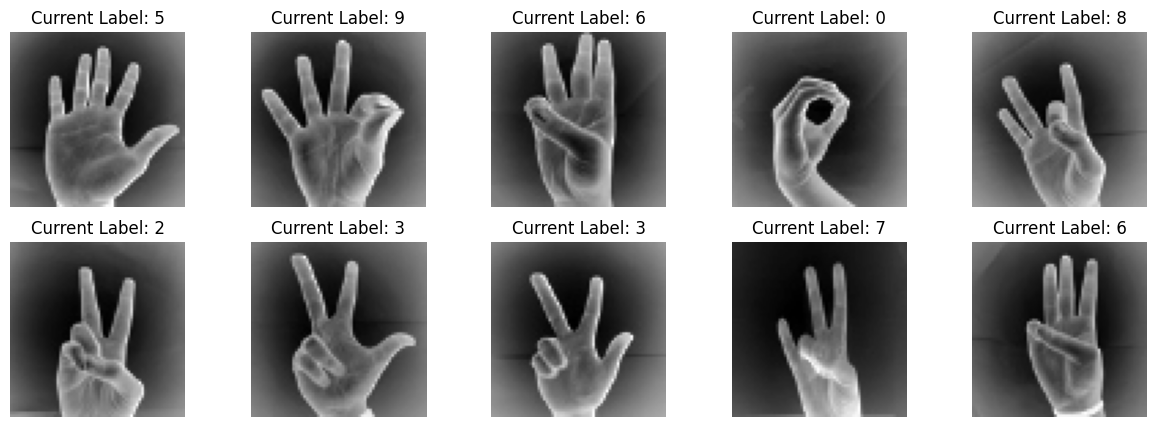

In [10]:
# Plot to make sure the data is loaded properly
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')  # Remove channel dim
    plt.title(f"Current Label: {Y_train[i]}")
    plt.axis('off')
plt.show()

### Main CNN Implementation

In [ ]:
# Defining a CNN model
def build_cnn(input_shape=(64, 64, 1), num_classes=10):
    model = models.Sequential([
        # Convolutional Layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),  # added more conv layers
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),    # added dropout
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [ ]:
model = build_cnn()
model.summary()

/Users/anthamorious/Library/Mobile Documents/com~apple~CloudDocs/University/University of Houston/Semesters/🎓 Spring 2025/🌹 COSC 4337 - Data Science II/Project/Progress Report/baseline_code/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 388,298 (1.48 MB)

 Trainable params: 388,298 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# train the model
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, Y_test)
)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.2325 - loss: 2.1541 - val_accuracy: 0.6174 - val_loss: 1.0277
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7355 - loss: 0.8333 - val_accuracy: 0.7990 - val_loss: 0.6333
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8368 - loss: 0.5091 - val_accuracy: 0.8475 - val_loss: 0.4901
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8984 - loss: 0.3100 - val_accuracy: 0.8910 - val_loss: 0.3657
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9225 - loss: 0.2253 - val_accuracy: 0.9104 - val_loss: 0.3542
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9396 - loss: 0.1863 - val_accuracy: 0.9056 - val_loss: 0.3377
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9414 - loss: 0.1810 - val_accuracy: 0.9177 - val_loss: 0.2581
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9707 - loss: 0.0853 - val_accuracy: 0.9104 - v

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

13/13 - 0s - 17ms/step - accuracy: 0.9395 - loss: 0.2370
Baseline Test Accuracy: 0.9395


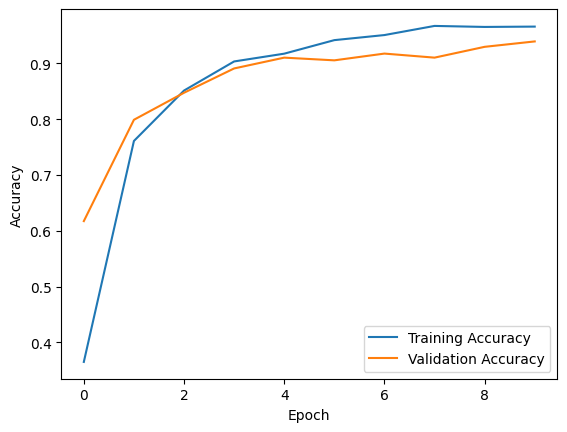

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluate Predictions with Confusion Matrix & Classification Report


In [16]:
# Predict on Test Set
y_pred = model.predict(X_test).argmax(axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


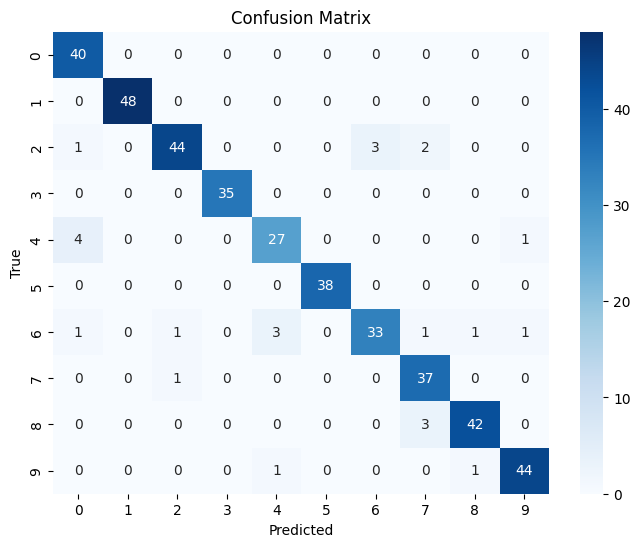

In [17]:
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Precision, Recall, F1-Score Report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        40
           1       1.00      1.00      1.00        48
           2       0.96      0.88      0.92        50
           3       1.00      1.00      1.00        35
           4       0.87      0.84      0.86        32
           5       1.00      1.00      1.00        38
           6       0.92      0.80      0.86        41
           7       0.86      0.97      0.91        38
           8       0.95      0.93      0.94        45
           9       0.96      0.96      0.96        46

    accuracy                           0.94       413
   macro avg       0.94      0.94      0.94       413
weighted avg       0.94      0.94      0.94       413



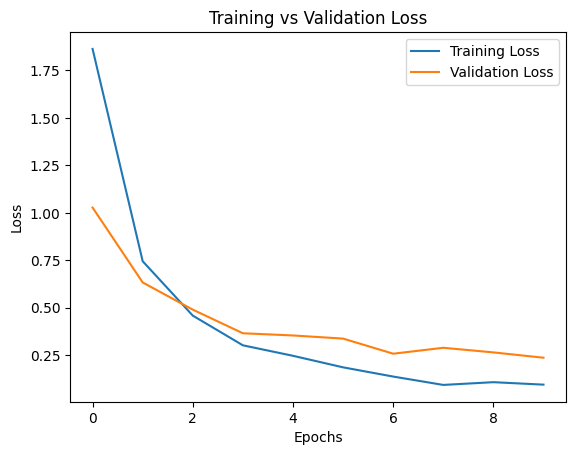

In [ ]:
# Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.title('Training vs Validation Loss')
plt.show()